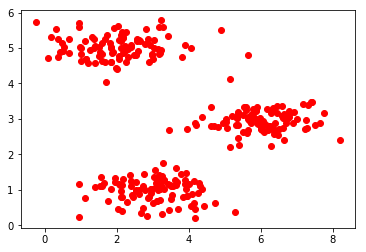

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from scipy.io import loadmat

matfile = loadmat('ex7data2.mat')

x_data = matfile['X'][:,[0]]
y_data = matfile['X'][:,[1]]

plt.plot(x_data, y_data, 'ro')
plt.show()

centroids: 
[[ 1.95399466  5.02557006]
 [ 6.03366736  3.00052511]
 [ 3.04367119  1.01541041]]


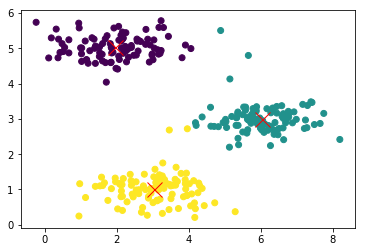

In [85]:
cluster_count = 3

points = tf.constant(matfile['X'])
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [cluster_count, -1]))

points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)

means = []
for c in range(cluster_count):
    means.append(
        tf.reduce_mean(
            tf.gather(points, 
                      tf.reshape(
                          tf.where(tf.equal(assignments, c)), 
                          [1, -1]
                      )
            ), 
            reduction_indices=[1]
        )
    )

new_centroids = tf.concat(means, 0)
update_centroids = tf.assign(centroids, new_centroids)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in xrange(100):
        [_, centroid_values, points_values, assignment_values] = sess.run(
            [update_centroids, centroids, points, assignments]
        )
        
    print "centroids: \n", centroid_values
    plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values)
    plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'rx', markersize=15)
    plt.show()